
## Imports

In [16]:
import cv2 
from google.colab.patches import cv2_imshow
import random
import numpy as np
import matplotlib.pyplot as plt  
from PIL import Image, ImageFilter 

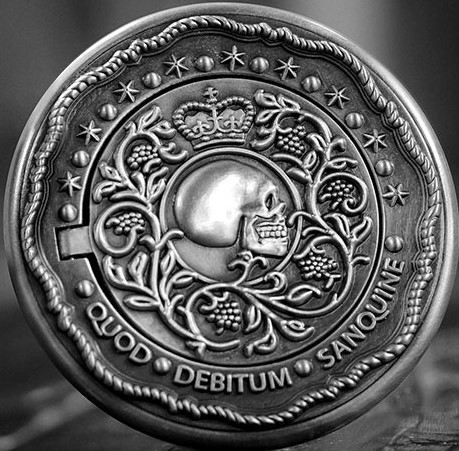

In [17]:
# Reading the image
original_image = cv2.imread("/content/marker.jpg", 0)

# Displaying the image
cv2_imshow(original_image)

## Add salt & pepper noise

In [18]:
def add_noise(image):
 
    # Getting the dimensions of the image
    row , col = image.shape
    
    # Randomly pick some pixels in the image for coloring them white
    number_of_pixels = random.randint(300, 7000)     # Pick a random number between 300 and 7000
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        image[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in the image for coloring them black
    number_of_pixels = random.randint(300 , 7000)   # Pick a random number between 300 and 7000
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        image[y_coord][x_coord] = 0
         
    return image

In [34]:
# Saving the noisy image
noisy_image = add_noise(original_image)
cv2.imwrite('/content/salt-and-pepper-marker.jpg',
           noisy_image)

True

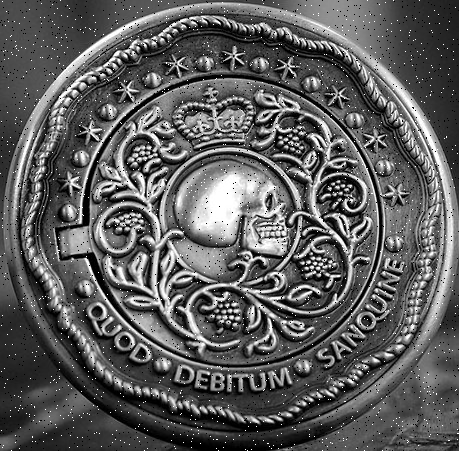

In [35]:
cv2_imshow(noisy_image)

## Apply average filter

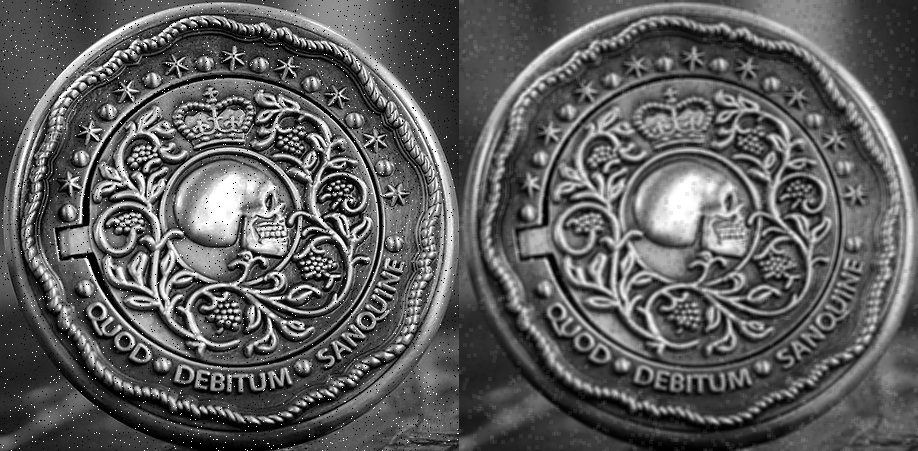

In [36]:
kernel = np.ones((4,4),np.float32)/16
image_after_average = cv2.filter2D(noisy_image,-1,kernel)
compare = np.concatenate((noisy_image, image_after_average), axis=1)
cv2_imshow(compare)

## Median filter

In [37]:
median = cv2.medianBlur(noisy_image, 3)

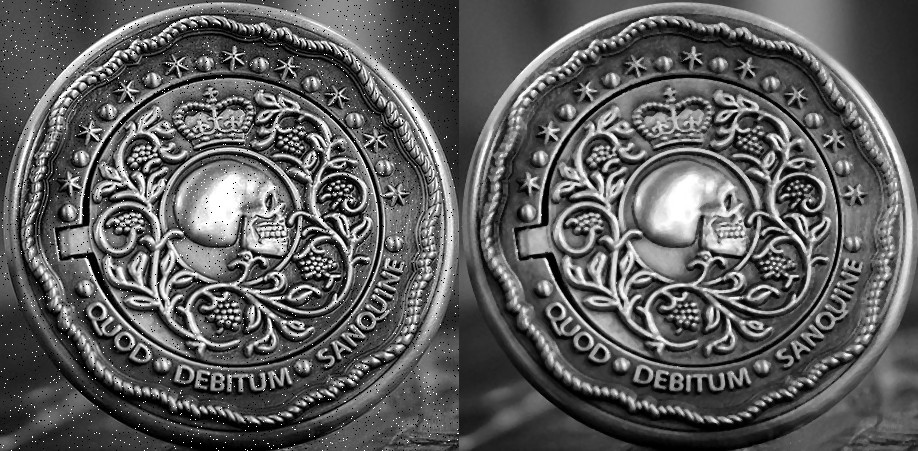

In [38]:
compare = np.concatenate((noisy_image, median), axis=1)
cv2_imshow(compare)

## Rank order filter

Text(0.5, 1.0, 'Rank 7')

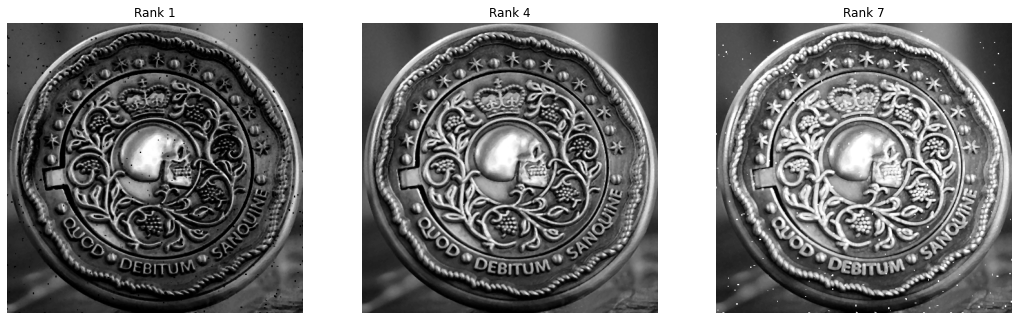

In [39]:
# creating an image object 
image1 = Image.open(r'/content/salt-and-pepper-marker.jpg') 
     
# applying the rank filter 
image2 = image1.filter(ImageFilter.RankFilter(size = 3, rank = 1)) 
image3 = image1.filter(ImageFilter.RankFilter(size = 3, rank = 4))
image4 = image1.filter(ImageFilter.RankFilter(size = 3, rank = 7))

# Displaying the images after rank filter
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.axis('off'), plt.imshow(image2, 'gray')
plt.title('Rank 1')

plt.subplot(1,3,2)
plt.axis('off'), plt.imshow(image3, 'gray')
plt.title('Rank 4')

plt.subplot(1,3,3)
plt.axis('off'), plt.imshow(image4, 'gray')
plt.title('Rank 7')


# Sharpening Filters

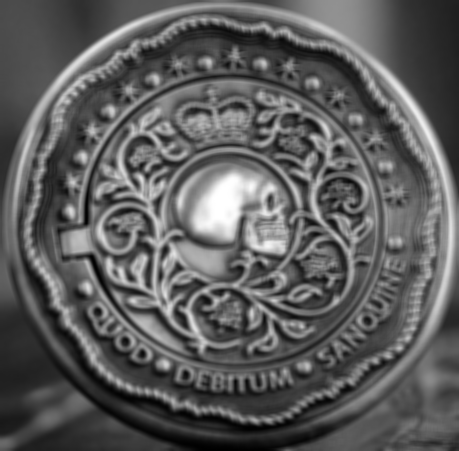

In [25]:
# Reading the original image
original_image = cv2.imread("/content/marker.jpg", 0)

# Applying average filter with large window for blurring the image
blurring_kernel = np.ones((6,6),np.float32)/36   # the filter kernel used for blurring

# Applying the filter
blurred_image = cv2.filter2D(original_image,-1,blurring_kernel)

# Display the blurred image
cv2_imshow(blurred_image)

In [26]:
def display_images(x_edges, y_edges):
  '''
  Displaying first order derivative filters images 

  Parameters:
          (x_edges): the image after applying X axis filter (df/dx) 
          (y_edges): the image after applying y axis filter (df/dy) 
  ''' 
  
  # Displaying the edges along X-axis
  plt.figure(figsize=(18,8))
  plt.subplot(1,3,1)
  plt.axis('off'), plt.imshow(x_edges, 'gray')
  plt.title('X edges')

  # Displaying the edges along y-axis
  plt.subplot(1,3,2)
  plt.axis('off'), plt.imshow(y_edges, 'gray')
  plt.title('y edges')

  # Displaying the whole image after applying the filter
  plt.subplot(1,3,3)
  plt.axis('off'), plt.imshow(x_edges + y_edges , 'gray')
  plt.title('Image after Perwitt')

## Perwitt filter

In [27]:
def perwitt(image):
  kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # filter's x kernel detect the edges along X-axis
  kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # filter's x kernel detect the edges along y-axis

  # applying the filter
  edges_along_x = cv2.filter2D(image,-1, kernel_x)
  edges_along_y = cv2.filter2D(image,-1, kernel_y)

  # Displaying the images after Perwitt filter
  display_images(edges_along_x, edges_along_y)

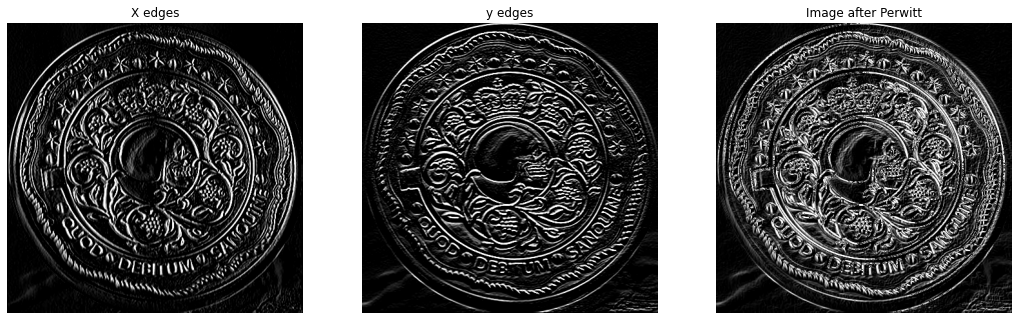

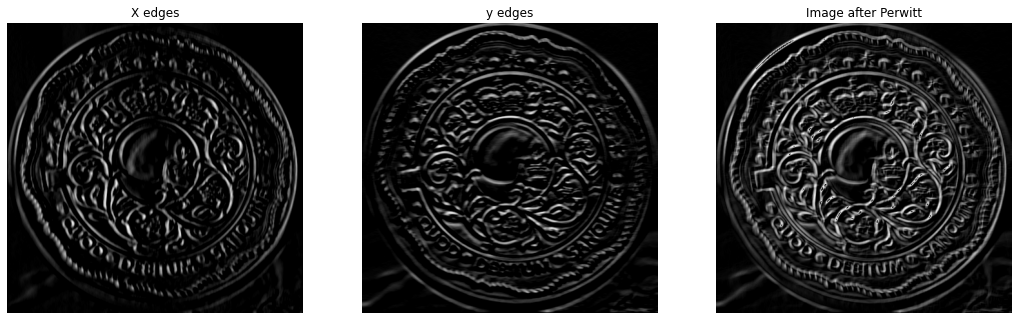

In [28]:
# applying perwitt filter on the original image
perwitt(original_image)

# applying perwitt filter on the blurred image
perwitt(blurred_image)

##Sobel filter

In [29]:
def sobel(image):

  kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # filter's x kernel to detect the edges along X-axis
  kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # filter's x kernel detect the edges along y-axis

  # applying the filter
  edges_along_x = cv2.filter2D(image,-1, kernel_x)
  edges_along_y = cv2.filter2D(image,-1, kernel_y)

  # Displaying the images after Sobel filter
  display_images(edges_along_x, edges_along_y)

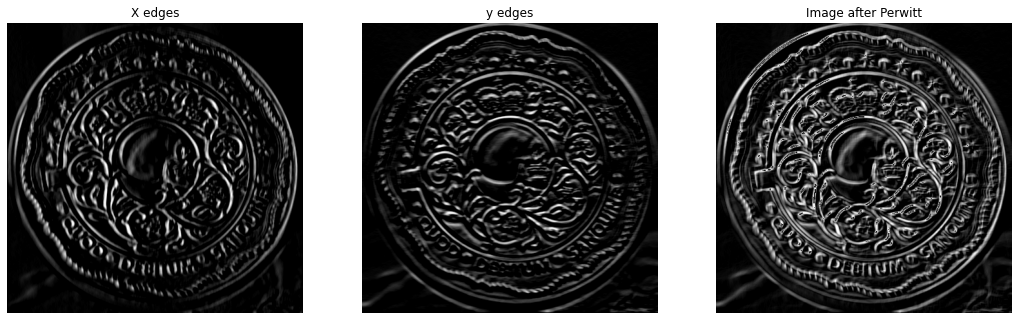

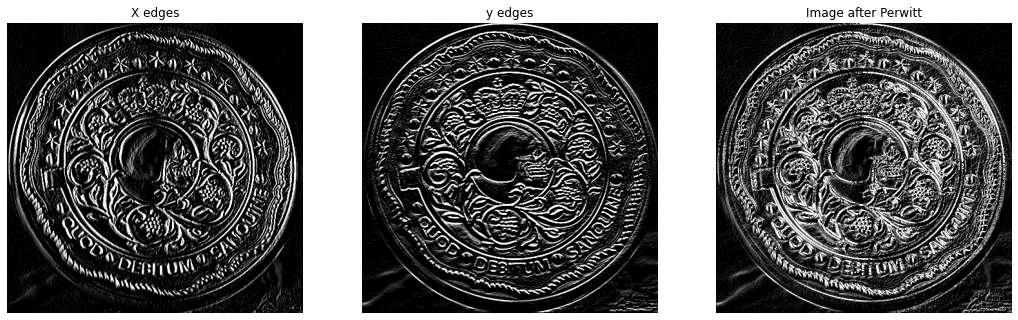

In [30]:
# applying perwitt filter on the blurred image
sobel(blurred_image)

# applying perwitt filter on the original image
sobel(original_image)

## laplacian filter

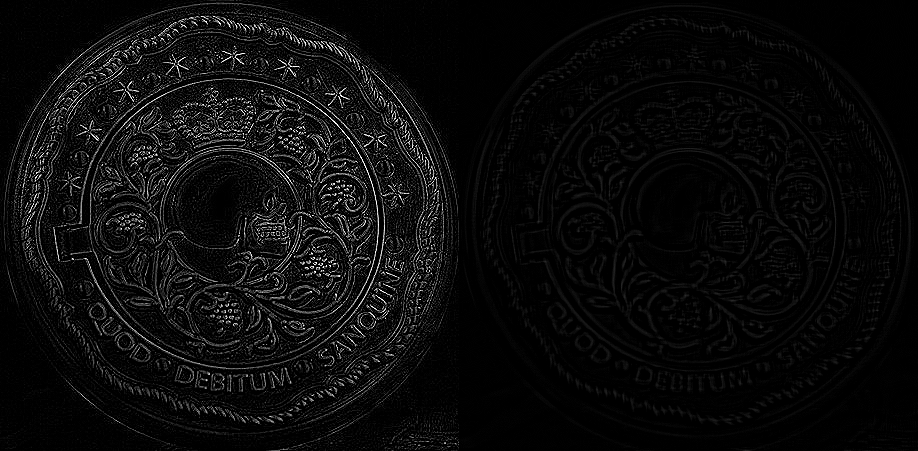

In [31]:
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])   # laplacian filter kernel

# applying the filter
laplacian_original_image = cv2.filter2D(original_image,-1,laplacian_kernel)  
laplacian_blurred_image = cv2.filter2D(blurred_image,-1,laplacian_kernel) 

# Displaying the images after laplacian filter
compare = np.concatenate((laplacian_original_image, laplacian_blurred_image), axis=1)
cv2_imshow(compare)

## LoG filter 

In [32]:
def LOG(image):
  # Apply Gaussian Blur
  gaussian_blur = cv2.GaussianBlur(image,(3,3),0)
  
  # Apply Laplacian 
  laplacian = cv2.Laplacian(gaussian_blur,-1)
  return laplacian

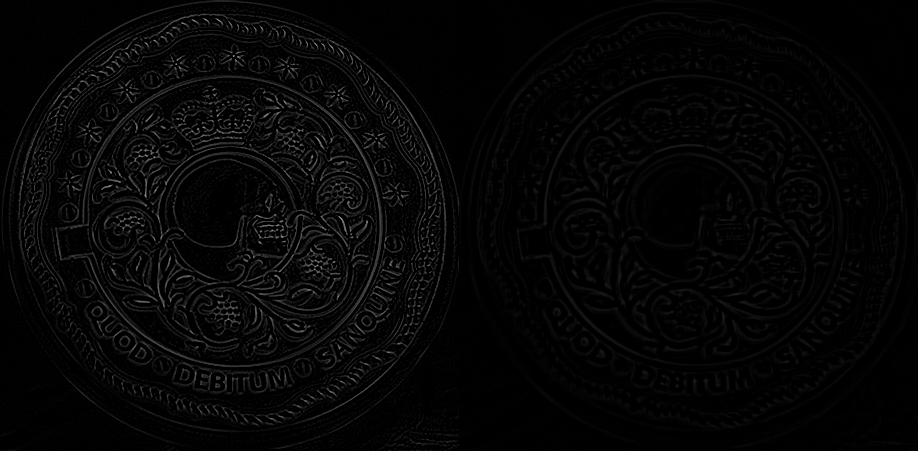

In [33]:
# applying LoG filter on the original image
original_LOG = LOG(original_image)

# applying LoG filter on the blurred image
blurred_LOG = LOG(blurred_image)

# display images after applying LoG filter
compare = np.concatenate((original_LOG, blurred_LOG), axis=1)
cv2_imshow(compare)